In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

## Time Series Analysis

## Understanding the difference between Python and pandas date tools

In [5]:
# begin by importing the datetime module into our namespace and creating a date, time, and datetime object
import datetime

In [6]:
date = datetime.date(year=2013, month=6, day=7)

In [7]:
time = datetime.time(hour=12, minute=30, second=19, microsecond=463198)

In [8]:
dt = datetime.datetime(year=2013, month=6, day=7,
 hour=12, minute=30, second=19,
 microsecond=463198)

In [9]:
print("date is ", date)

date is  2013-06-07


In [10]:
print("time is", time)

time is 12:30:19.463198


In [11]:
print("datetime is", dt)

datetime is 2013-06-07 12:30:19.463198


In [12]:
#construct and print out a timedelta object, the other major data type from the datetime module
td = datetime.timedelta(weeks=2, days=5, hours=10,
 minutes=20, seconds=6.73,
 milliseconds=99, microseconds=8)

In [13]:
print(td)

19 days, 10:20:06.829008


In [14]:
#Add/subtract this timedelta to the date and datetime objects from step 1
print('new date is', date + td)

new date is 2013-06-26


In [15]:
print('new datetime is', dt + td)

new datetime is 2013-06-26 22:50:26.292206


In [16]:
pd.Timestamp(year=2012, month=12, day=21, hour=5,
 minute=10, second=8, microsecond=99)

Timestamp('2012-12-21 05:10:08.000099')

In [17]:
pd.Timestamp('2016/1/10')

Timestamp('2016-01-10 00:00:00')

In [18]:
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [19]:
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [20]:
pd.Timestamp('2016-01-05T05:34:43.123456789')

Timestamp('2016-01-05 05:34:43.123456789')

In [21]:
pd.Timestamp(500)

Timestamp('1970-01-01 00:00:00.000000500')

In [22]:
pd.Timestamp(5000, unit='D')

Timestamp('1983-09-10 00:00:00')

In [23]:
# Timestamp constructor, but comes with a few different parameters for special situations.
pd.to_datetime('2015-5-13')

Timestamp('2015-05-13 00:00:00')

In [24]:
pd.to_datetime('2015-13-5', dayfirst=True)

Timestamp('2015-05-13 00:00:00')

In [25]:
pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm',
 format='Start Date: %b %d, %Y Start Time: %I:%M %p')

Timestamp('2017-09-30 13:30:00')

In [26]:
pd.to_datetime(100, unit='D', origin='2013-1-1')

Timestamp('2013-04-11 00:00:00')

In [27]:
#he to_datetime function converts entire lists or Series of strings or integers to Timestamps.
s = pd.Series([10, 100, 1000, 10000])

In [28]:
pd.to_datetime(s, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [29]:
 s = pd.Series(['12-5-2015', '14-1-2013',
 '20/12/2017', '40/23/2017'])

In [30]:
pd.to_datetime(s, dayfirst=True, errors='coerce')

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [31]:
pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds')

Timedelta('12 days 05:03:00.123456')

In [32]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [33]:
pd.Timedelta(100, unit='W')

Timedelta('700 days 00:00:00')

In [34]:
pd.to_timedelta('67:15:45.454')

Timedelta('2 days 19:15:45.454000')

In [35]:
s = pd.Series([10, 100])

In [36]:
pd.to_timedelta(s, unit='s')

0   00:00:10
1   00:01:40
dtype: timedelta64[ns]

In [37]:
time_strings = ['2 days 24 minutes 89.67 seconds',
 '00:45:23.6']

In [38]:
pd.to_timedelta(time_strings)

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

In [39]:
# Timedeltas may be added or subtracted from Timestamps and from each other.
# They may even be divided from each other to return a float
pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timedelta('24 days 10:06:00')

In [40]:
pd.Timestamp('1/1/2017') + \
 pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timestamp('2017-01-25 10:06:00')

In [41]:
td1 = pd.to_timedelta([10, 100], unit='s')

In [42]:
td2 = pd.to_timedelta(['3 hours', '4 hours'])

In [43]:
td1 + td2

TimedeltaIndex(['03:00:10', '04:01:40'], dtype='timedelta64[ns]', freq=None)

In [44]:
# Both Timestamps and Timedeltas have a large number of features available as attributes and methods.
ts = pd.Timestamp('2016-10-1 4:23:23.9')

In [45]:
ts.ceil('h')

Timestamp('2016-10-01 05:00:00')

In [46]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2016, 10, 1, 4, 23, 23)

In [47]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [48]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 900000)

In [49]:
td = pd.Timedelta(125.8723, unit='h')

In [50]:
td

Timedelta('5 days 05:52:20.280000')

In [51]:
td.round('min')

Timedelta('5 days 05:52:00')

In [52]:
td.components

Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=280, microseconds=0, nanoseconds=0)

In [53]:
td.total_seconds()

453140.28

## Slicing time series intelligently

In [54]:
#Read in the Denver crimes dataset from the hdf5 file crimes.h5, and output
#the column data types and the first few rows. The hdf5 file format allows
#efficient storage of large scientific data and is completely different from a CSV
#text file
crime = pd.read_hdf('data/crime.h5', 'crime')

In [55]:
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [56]:
crime = crime.set_index('REPORTED_DATE') 

In [57]:
# REPORTED_DATE is set as the index column and doesn't show up among the dtypes......LOOK AT LATER

## Using methods that only work with a DatetimeIndex

In [58]:
# Read in the crime hdf5 dataset, set the index as REPORTED_DATE, and ensure that we have a DatetimeIndex
crime = pd.read_hdf('data/crime.h5', 'crime') .set_index('REPORTED_DATE')

In [59]:
print(type(crime.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [60]:
crime.between_time('2:00', '5:00', include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [61]:
# Select all dates at a specific time with at_time
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0


In [62]:
crime_sort = crime.sort_index()

In [63]:
crime_sort.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [64]:
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [65]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [66]:
crime_sort.loc[:'2012-06']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [67]:
crime_sort.first('5D')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [68]:
crime_sort.first('A') # one year end

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


## Aggregating weekly crime and traffic accidents separately

In [69]:
# Read in the crime hdf5 dataset, set the index as REPORTED_DATE, and then sort it 
# to increase performance for the rest of the recipe
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
 .set_index('REPORTED_DATE') \
 .sort_index()

In [70]:
# set the resample method to group by each quarter of the year and then sum the
# IS_CRIME and IS_TRAFFIC columns for each group
crime_quarterly = crime_sort.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()

In [71]:
crime_quarterly.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [72]:
# use the offset alias QS to represent the start of the quarter
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum().head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [73]:
# verify these results by checking whether the second quarter of data is correct
crime_sort.loc['2012-4-1':'2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [74]:
# replicate this operation using the groupby method
crime_quarterly2 = crime_sort.groupby(pd.Grouper(freq='Q')) \
 ['IS_CRIME', 'IS_TRAFFIC'].sum()

In [75]:
crime_quarterly2.equals(crime_quarterly)

True

In [76]:
plot_kwargs = dict(figsize=(16,4),
 color=['black', 'lightgrey'],
 title='Denver Crimes and Traffic Accidents')

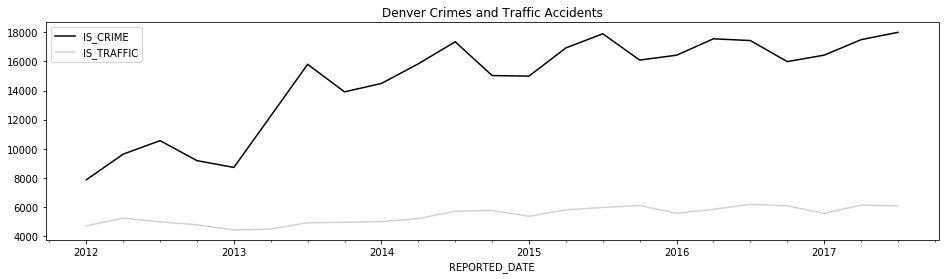

In [77]:
crime_quarterly.plot(**plot_kwargs) # NIIIIIICE

## Measuring crime by weekday and year

In [78]:
# Read in the Denver crime hdf5 dataset leaving the REPORTED_DATE as a column
crime = pd.read_hdf('data/crime.h5', 'crime')

In [79]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [80]:
wd_counts = crime['REPORTED_DATE'].dt.weekday_name \
 .value_counts()

In [81]:
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [82]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
 'Friday', 'Saturday', 'Sunday']

In [83]:
title = 'Denver Crimes and Traffic Accidents per Weekday'

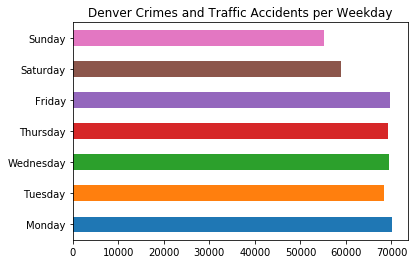

In [84]:
wd_counts.reindex(days).plot(kind='barh', title=title)

In [85]:
title = 'Denver Crimes and Traffic Accidents per Year'

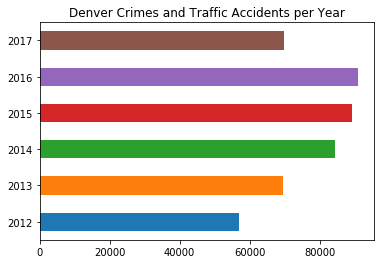

In [86]:
crime['REPORTED_DATE'].dt.year.value_counts() \
 .sort_index() \
 .plot(kind='barh', title=title)

In [87]:
weekday = crime['REPORTED_DATE'].dt.weekday_name

In [88]:
year = crime['REPORTED_DATE'].dt.year

In [89]:
crime_wd_y = crime.groupby([year, weekday]).size()

In [90]:
crime_wd_y.head(10)

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
dtype: int64

In [91]:
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday']) .unstack('Weekday')

In [92]:
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [93]:
criteria = crime['REPORTED_DATE'].dt.year == 2017

In [94]:
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

In [95]:
round(272 / 365, 3)

0.745

In [96]:
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272) \
 .groupby(year) \
 .mean() \
 .round(3)

In [97]:
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [98]:
crime_table.loc[2017] = crime_table.loc[2017].div(.748) \
 .astype('int')

In [99]:
crime_table = crime_table.reindex(columns=days)

In [100]:
crime_table

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


In [101]:
import seaborn as sns

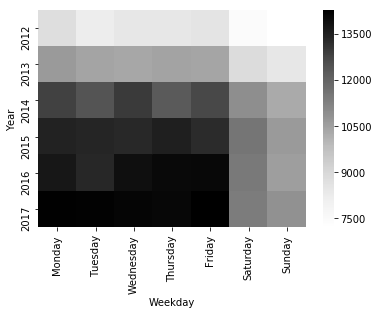

In [103]:
sns.heatmap(crime_table, cmap='Greys')

In [104]:
denver_pop = pd.read_csv('data/denver_pop.csv', index_col='Year')

In [105]:
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [106]:
den_100k = denver_pop.div(100000).squeeze()

In [107]:
crime_table2 = crime_table.div(den_100k, axis='index') .astype('int')

In [108]:
crime_table2

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


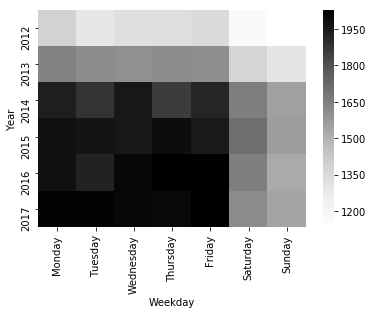

In [109]:
sns.heatmap(crime_table2, cmap='Greys')

## Grouping with anonymous functions with a DatetimeIndex

In [110]:
# Read in the Denver crime hdf5 file, place the REPORTED_DATE column in the index, and sort it
crime_sort = pd.read_hdf('data/crime.h5', 'crime') .set_index('REPORTED_DATE') .sort_index()

In [111]:
#The DatetimeIndex itself has many of the same attributes and methods as a pandas Timestamp.
common_attrs = set(dir(crime_sort.index)) & set(dir(pd.Timestamp))

In [112]:
print([attr for attr in common_attrs if attr[0] != '_'])

['hour', 'ceil', 'resolution', 'day_name', 'is_year_start', 'freqstr', 'is_quarter_end', 'minute', 'weekday', 'microsecond', 'year', 'days_in_month', 'time', 'round', 'is_year_end', 'is_month_start', 'is_quarter_start', 'day', 'strftime', 'weekofyear', 'tz', 'normalize', 'date', 'floor', 'dayofweek', 'dayofyear', 'max', 'freq', 'quarter', 'daysinmonth', 'min', 'week', 'to_period', 'tz_localize', 'month', 'nanosecond', 'tzinfo', 'to_pydatetime', 'to_julian_date', 'month_name', 'is_leap_year', 'second', 'is_month_end', 'tz_convert', 'weekday_name']


In [113]:
crime_sort.index.weekday_name.value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [114]:
crime_sort.groupby(lambda x: x.weekday_name) ['IS_CRIME', 'IS_TRAFFIC'].sum()

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [115]:
funcs = [lambda x: x.round('2h').hour, lambda x: x.year]

In [116]:
cr_group = crime_sort.groupby(funcs) ['IS_CRIME', 'IS_TRAFFIC'].sum()

In [117]:
cr_final = cr_group.unstack()

In [118]:
cr_final.style.highlight_max(color='lightgrey')

## Grouping by a Timestamp and another column

In [119]:
# Read in the employee dataset, and create a DatetimeIndex with the HIRE_DATE column
employee = pd.read_csv('data/employee.csv',
 parse_dates=['JOB_DATE', 'HIRE_DATE'],
 index_col='HIRE_DATE')

In [120]:
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


In [121]:
# a simple grouping by just gender, and find the average salary
employee.groupby('GENDER')['BASE_SALARY'].mean().round(-2)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

In [122]:
# the average salary based on hire date, and group everyone into 10-year buckets
employee.resample('10AS')['BASE_SALARY'].mean().round(-2)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
2018-01-01         NaN
Name: BASE_SALARY, dtype: float64

In [124]:
sal_avg2 = employee.groupby(['GENDER',
 pd.Grouper(freq='10AS')]) \
 ['BASE_SALARY'].mean().round(-2)

In [125]:
sal_avg2

GENDER  HIRE_DATE 
Female  1968-01-01         NaN
        1978-01-01     57100.0
        1988-01-01     57100.0
        1998-01-01     54700.0
        2008-01-01     47300.0
Male    1958-01-01     81200.0
        1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, dtype: float64

In [126]:
sal_final = sal_avg2.unstack('GENDER')

In [127]:
sal_final

GENDER,Female,Male
HIRE_DATE,,
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0
1958-01-01,NaN,81200.0


## Finding the last time crime was 20% lower with merge_asof

In [128]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
 .set_index('REPORTED_DATE') \
 .sort_index()

In [129]:
crime_sort.index.max()

Timestamp('2017-09-29 06:16:00')

In [130]:
crime_sort = crime_sort[:'2017-8']

In [131]:
crime_sort.index.max()

Timestamp('2017-08-31 23:52:00')

In [132]:
all_data = crime_sort.groupby([pd.Grouper(freq='M'),
 'OFFENSE_CATEGORY_ID']).size()

In [133]:
all_data.head()

REPORTED_DATE  OFFENSE_CATEGORY_ID
2012-01-31     aggravated-assault     113
               all-other-crimes       124
               arson                    5
               auto-theft             275
               burglary               343
dtype: int64

In [134]:
all_data = all_data.sort_values().reset_index(name='Total')

In [135]:
all_data.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total
0,2014-12-31,murder,1
1,2013-01-31,arson,1
2,2016-05-31,murder,1
3,2012-12-31,murder,1
4,2016-12-31,murder,1


In [136]:
goal = all_data[all_data['REPORTED_DATE'] == '2017-8-31'] \
 .reset_index(drop=True)

In [137]:
goal['Total_Goal'] = goal['Total'].mul(.8).astype(int)

In [138]:
goal.head()

,REPORTED_DATE,OFFENSE_CATEGORY_ID,Total,Total_Goal
0,2017-08-31,murder,7,5
1,2017-08-31,arson,7,5
2,2017-08-31,sexual-assault,57,45
3,2017-08-31,robbery,108,86
4,2017-08-31,white-collar-crime,138,110


In [140]:
pd.merge_asof(goal, all_data, left_on='Total_Goal', right_on='Total', by='OFFENSE_CATEGORY_ID', suffixes=('_Current', '_Last'))

MergeError: incompatible merge keys [1] int32 and int64, must be the same type